In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv(r"C:\Users\Mgh59\OneDrive\Escritorio\Clave Python SQL\Portafolio\Deteccion de Fraudes\creditcard.csv")


In [3]:
# Vista general
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head())

Dimensiones del dataset: (284807, 31)

Primeras filas:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Información general
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-nul

In [5]:
# Revisar valores nulos
print("\nValores nulos:")
print(df.isnull().sum().sum())                      


Valores nulos:
0


In [6]:
# Distribución de la variable objetivo (fraude o no fraude)
print("\nDistribución de clases:")
print(df["Class"].value_counts(normalize=True) * 100)


Distribución de clases:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


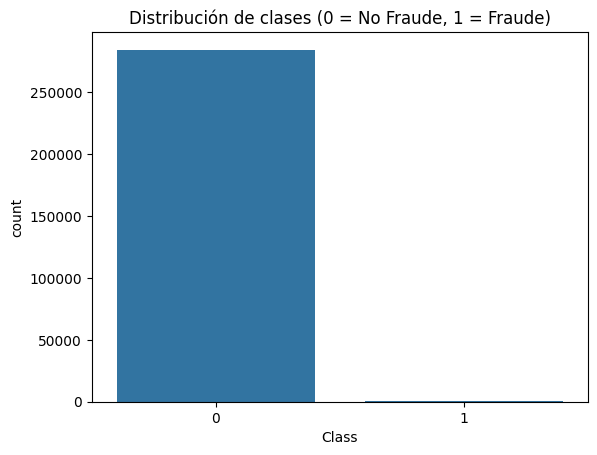

In [7]:
# Gráfica de distribución
sns.countplot(x="Class", data=df)
plt.title("Distribución de clases (0 = No Fraude, 1 = Fraude)")
plt.show()

In [8]:
# Estadísticas generales
print("Estadísticas generales:")
display(df.describe())

Estadísticas generales:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Estadísticas separadas por clase
print("\nEstadísticas para transacciones NO fraudulentas:")
display(df[df["Class"] == 0]["Amount"].describe())


Estadísticas para transacciones NO fraudulentas:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
print("\nEstadísticas para transacciones FRAUDULENTAS:")
display(df[df["Class"] == 1]["Amount"].describe())


Estadísticas para transacciones FRAUDULENTAS:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

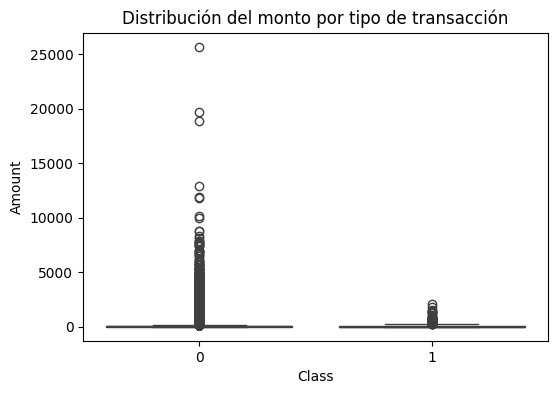

In [11]:
# Boxplot de montos
plt.figure(figsize=(6,4))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Distribución del monto por tipo de transacción")
plt.show()

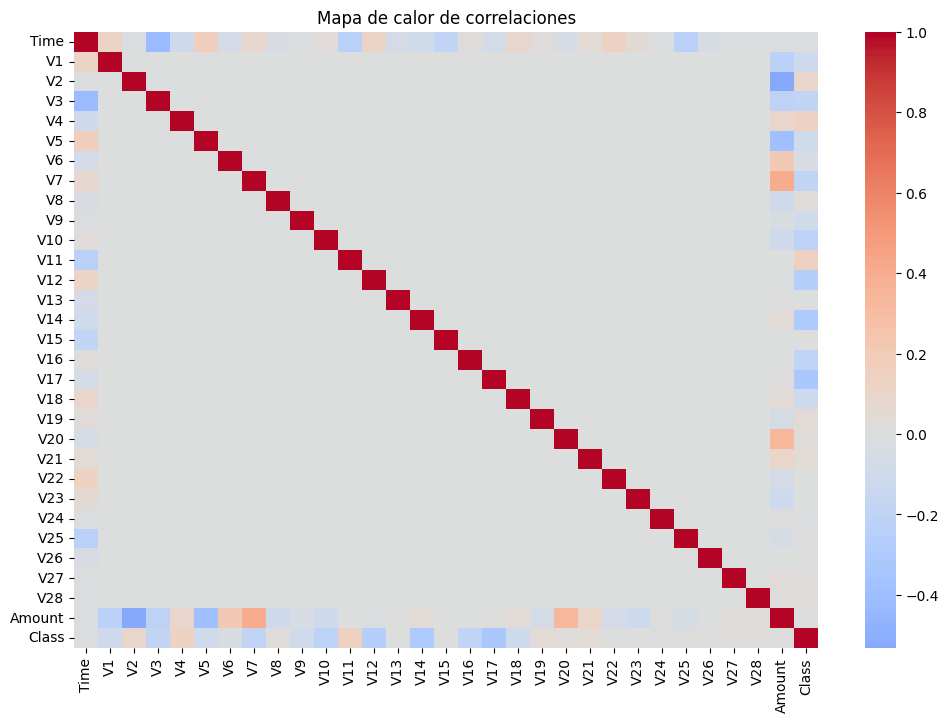

In [12]:
# Correlación entre variables
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlaciones")
plt.show()

In [13]:
# Correlaciones con la variable objetivo 'Class'
corr_target = corr["Class"].sort_values(ascending=False)
print("\nVariables más correlacionadas con el fraude:")
print(corr_target.head(10))
print("\nVariables menos correlacionadas con el fraude:")
print(corr_target.tail(10))


Variables más correlacionadas con el fraude:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

Variables menos correlacionadas con el fraude:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop("Class", axis=1)
y = df["Class"]

In [16]:
# Escalamos las variables 'Amount' y 'Time' (las demás ya están transformadas con PCA)
scaler = StandardScaler()
X[["Time", "Amount"]] = scaler.fit_transform(X[["Time", "Amount"]])

In [17]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # mantiene la proporción de clases
)

In [18]:
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
print("Distribución de clases en train:")
print(y_train.value_counts(normalize=True) * 100)

Tamaño del conjunto de entrenamiento: (227845, 30)
Tamaño del conjunto de prueba: (56962, 30)
Distribución de clases en train:
Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
)

Desbalanceo de clases

In [21]:
# Crear y entrenar el modelo
rf = RandomForestClassifier(
    n_estimators=100,        # número de árboles
    max_depth=None,          # profundidad ilimitada
    class_weight='balanced', # ajusta pesos por clase (muy importante!)
    random_state=42,
    n_jobs=-1                # usa todos los núcleos del procesador
)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
# Predicciones
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

In [23]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4))

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9605    0.7449    0.8391        98

    accuracy                         0.9995     56962
   macro avg     0.9800    0.8724    0.9194     56962
weighted avg     0.9995    0.9995    0.9995     56962



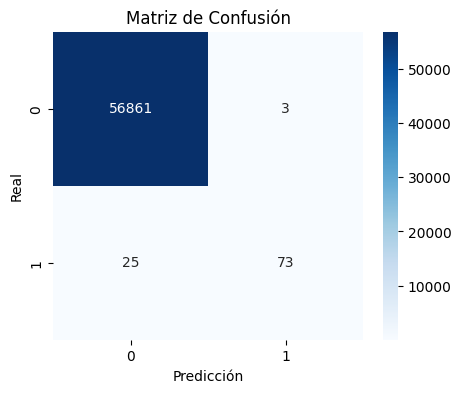

In [24]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

ROC-AUC

AUC-ROC: 0.9529


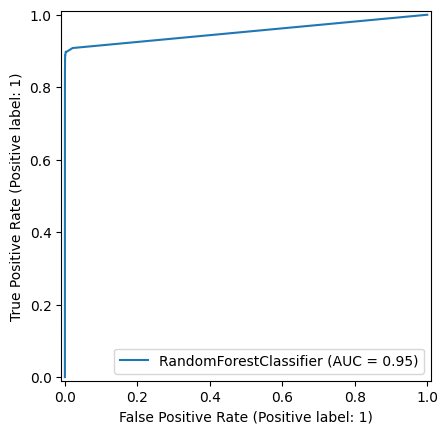

In [26]:
# Curva ROC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC: {roc_auc:.4f}")

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

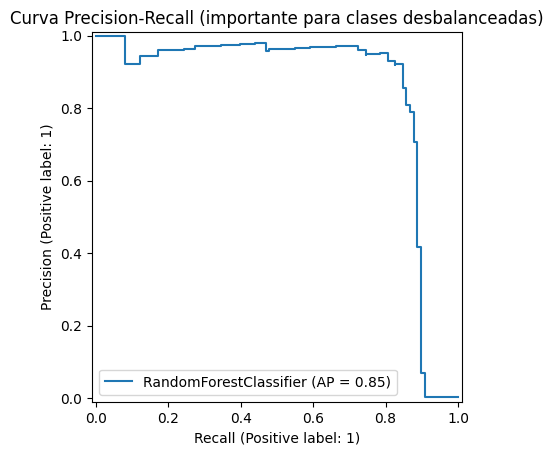

In [27]:
# Curva Precision-Recall
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test)
plt.title("Curva Precision-Recall (importante para clases desbalanceadas)")
plt.show()

In [28]:
# Importancia de características del modelo
importances = rf.feature_importances_
features = X.columns

In [29]:
# Crear un DataFrame ordenado
feat_importance = (
    pd.DataFrame({'Feature': features, 'Importance': importances})
    .sort_values(by='Importance', ascending=False)
)

In [31]:
# Mostrar las 15 más importantes
print("Top 15 variables más importantes:")
display(feat_importance.head(15))

Top 15 variables más importantes:


,Feature,Importance
14,V14,0.179857
10,V10,0.115442
12,V12,0.096206
4,V4,0.095646
17,V17,0.095113
3,V3,0.068669
11,V11,0.056112
16,V16,0.040303
2,V2,0.036265
9,V9,0.026888


C:\Users\Mgh59\AppData\Local\Temp\ipykernel_10796\3959032700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


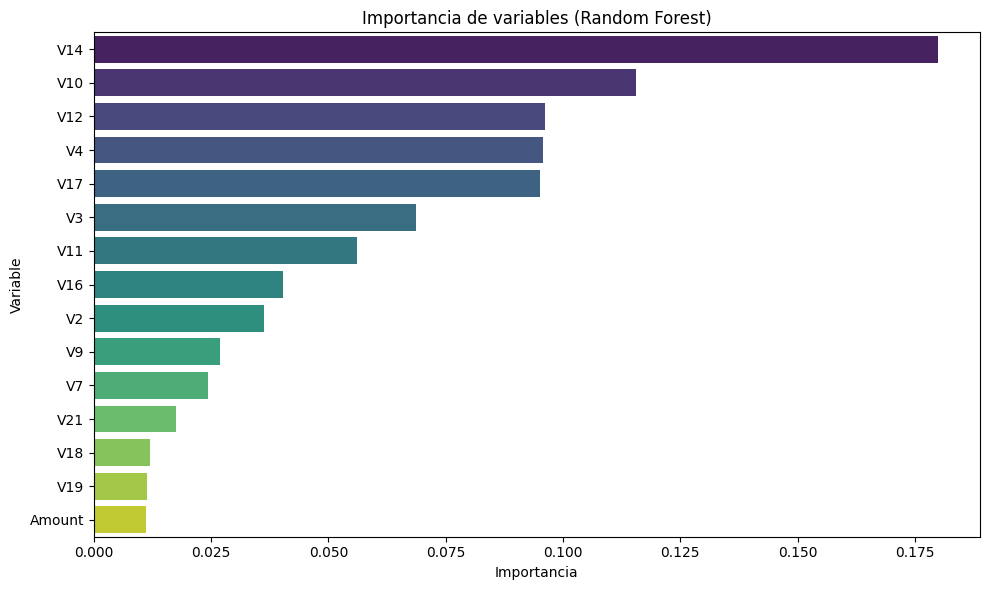

In [35]:
# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feat_importance.head(15),
    palette='viridis'
    )
plt.title("Importancia de variables (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()